In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
response = requests.get('https://www.rslashfakebaseball.com/api/plateappearances/pitching/MiLR/2962')

data = response.json()

In [ ]:
arr = np.array(data)
df = pd.DataFrame(data)
print(df.keys())

           paID league  season  session  gameID inning  inningID  playNumber  \
0   21110429036   MILR      11       10     429     B4      5367          36   
1   21110429037   MILR      11       10     429     B4      5367          37   
2   21110429038   MILR      11       10     429     B4      5367          38   
3   21110429039   MILR      11       10     429     B4      5367          39   
4   21110429043   MILR      11       10     429     B5      5378          43   
5   21110429044   MILR      11       10     429     B5      5378          44   
6   21110429045   MILR      11       10     429     B5      5378          45   
7   21110429046   MILR      11       10     429     B5      5378          46   
8   21110429050   MILR      11       10     429     B6      5381          50   
9   21110429051   MILR      11       10     429     B6      5381          51   
10  21110429052   MiLR      11       10     429     B6      5381          52   
11  21111436016   MILR      11       11 

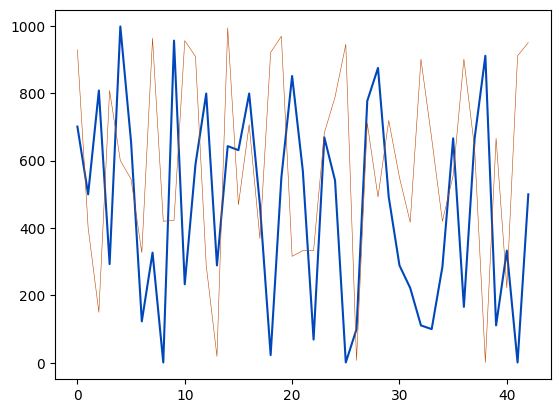

In [4]:
pitches = df.get('pitch')
swings = df.get('swing')
diff = df.get('diff')
x_arr = np.arange(len(pitches))

fig,ax = plt.subplots(1,1)

ax.plot(x_arr, pitches, color = '#0047ba')
ax.plot(x_arr, swings, color = '#bf4700', linewidth = .4)

In [5]:
_ = np.arange(len(pitches) - 1)

prev_pitch = pitches.to_numpy()[_ + 1] - pitches.to_numpy()[_]

bins = np.zeros(10)
range_bins = np.array(['  0-  99', '100- 199', '200- 299','300- 399','400- 499','500- 599','600- 699','700- 799','800- 899','900-1000'])
diff_bins = np.zeros(10)

for i, pitch in enumerate(pitches):
    if pitch < 100:
        bins[0] += 1
    elif pitch < 200:
        bins[1] += 1
    elif pitch < 300:
        bins[2] += 1
    elif pitch < 400:
        bins[3] += 1
    elif pitch < 500:
        bins[4] += 1
    elif pitch < 600:
        bins[5] += 1
    elif pitch < 700:
        bins[6] += 1
    elif pitch < 800:
        bins[7] += 1
    elif pitch < 900:
        bins[8] += 1
    else:
        bins[9] += 1


range_diff = np.array(['-500 to -400', '-399 to -300', '-299 to -200', '-199 to -100', ' -99 to    0', '   1 to  100', ' 101 to  200', ' 201 to  300', ' 301 to  400', ' 401 to  500'])

for i, pitch in enumerate(prev_pitch):
    if pitch < -401:
        diff_bins[0] += 1
    elif pitch < -301:
        diff_bins[1] += 1
    elif pitch < -201:
        diff_bins[2] += 1
    elif pitch < -101:
        diff_bins[3] += 1
    elif pitch < 1:
        diff_bins[4] += 1
    elif pitch < 101:
        diff_bins[5] += 1
    elif pitch < 201:
        diff_bins[6] += 1
    elif pitch < 301:
        diff_bins[7] += 1
    elif pitch < 401:
        diff_bins[8] += 1
    else:
        diff_bins[9] += 1

print('Pitch Frequency')
for i, (name, bin) in enumerate(zip(range_bins,bins)):
    print(name,'|',bin, '|', round(bin / len(pitches) * 100, 1), '%')

print()

print('Compared to previous pitch')
for i, (name, bin) in enumerate(zip(range_diff,diff_bins)):
    print(name,'|',bin, '|', round(bin / len(pitches) * 100, 1), '%')

print()

Pitch Frequency
  0-  99 | 5.0 | 11.6 %
100- 199 | 6.0 | 14.0 %
200- 299 | 6.0 | 14.0 %
300- 399 | 2.0 | 4.7 %
400- 499 | 2.0 | 4.7 %
500- 599 | 6.0 | 14.0 %
600- 699 | 6.0 | 14.0 %
700- 799 | 4.0 | 9.3 %
800- 899 | 3.0 | 7.0 %
900-1000 | 3.0 | 7.0 %

Compared to previous pitch
-500 to -400 | 9.0 | 20.9 %
-399 to -300 | 5.0 | 11.6 %
-299 to -200 | 2.0 | 4.7 %
-199 to -100 | 3.0 | 7.0 %
 -99 to    0 | 3.0 | 7.0 %
   1 to  100 | 2.0 | 4.7 %
 101 to  200 | 2.0 | 4.7 %
 201 to  300 | 4.0 | 9.3 %
 301 to  400 | 5.0 | 11.6 %
 401 to  500 | 7.0 | 16.3 %



In [6]:
gameID = df.get('gameID')

pitch_num = []

for i, pitch in enumerate(pitches):
    if i != 0:
        if gameID[i] != gameID[i - 1]:
            pitch_num.append(i)
    else:
        pitch_num.append(0)

print(pitch_num)
print(pitches.to_numpy()[pitch_num])

[0, 11, 20, 31, 39]
[701 589 851 222 111]


In [7]:
print(pitches)

0     701
1     500
2     808
3     293
4     998
5     655
6     123
7     327
8       1
9     956
10    233
11    589
12    799
13    289
14    643
15    631
16    799
17    469
18     23
19    550
20    851
21    569
22     69
23    669
24    541
25      1
26    100
27    777
28    875
29    492
30    289
31    222
32    111
33    100
34    285
35    666
36    166
37    666
38    911
39    111
40    333
41      1
42    500
Name: pitch, dtype: int64


In [24]:
players = pd.DataFrame(requests.get('https://www.rslashfakebaseball.com/api/players').json())

dusk = requests.get('https://www.rslashfakebaseball.com/api/players/name/Dusk Jackson').json()

print(players.keys())

Index(['playerID', 'playerName', 'Team', 'batType', 'pitchType', 'pitchBonus',
       'hand', 'priPos', 'secPos', 'tertPos', 'redditName', 'discordName',
       'discordID', 'status', 'posValue'],
      dtype='object')
